# TP2: Regresión del valor de valor medio de casas en distritos de California - Solución

![Districtos de California](resources/ca_map_counties.png "Districtos de California")

## Introducción - California Housing

Este es un popular [dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) que vamos a estar leyendo desde **Scikit-Learn**.

Se requiere construir una regresión que nos permita predecir el valor de valor medio de casas en distritos de California (medidos en ciento de miles de dólares $100.000). Este dataset deriva del censo de 1990 de EEUU, donde cada observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra (un bloque típicamente tiene una población de 600 a 3,000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que el número promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores grandes para grupos de bloques con pocos hogares y muchas casas vacías.

Los atributos en el orden que se guardaron en el dataset son:

- `MedInc`: Ingreso medio en el bloque
- `HouseAge`: Edad mediana de las casas en el bloque
- `AveRooms`: Número promedio de habitaciones por hogar.
- `AveBedrms`: Número promedio de dormitorios por hogar.
- `Population`: Población del bloque
- `AveOccup`: Número promedio de miembros por hogar.
- `Latitude`: Latitud del bloque
- `Longitude`: Longitud del bloque

## Tareas y preguntas a resolver:

In [1]:
# Importación de librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge

sns.set_theme(context='notebook', style='dark')

In [2]:
# Leemos el dataset
X, y = fetch_california_housing(as_frame=True, return_X_y=True)

# Juntamos los datos.
df_housing = pd.concat([X, y], axis=1)

print(f'Datos obtenidos: ')
df_housing.sample(n=5)

Datos obtenidos: 


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
9316,12.0933,10.0,8.179012,1.166667,427.0,2.635802,37.98,-122.46,5.00001
8447,3.3409,32.0,3.254902,1.009804,177.0,1.735294,33.90,-118.37,2.56300
16493,4.5170,21.0,5.749304,0.952646,1021.0,2.844011,38.03,-121.09,1.52200
6345,1.7206,27.0,4.505155,1.113402,469.0,4.835052,34.05,-117.75,1.07500
6797,2.9405,24.0,3.767588,0.987437,2937.0,3.689698,34.08,-118.14,2.17800


In [3]:
# Chequeamos la estadistica principal.
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
# Chequeamos los tipos de datos.
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
# Chequeamos valores nulos y NaN.
nan_count = df_housing.isnull().sum().sum()
null_count = df_housing.isnull().sum().sum()

print('Valores NaN: ', nan_count)
print('Valores nulos: ', null_count)

Valores NaN:  0
Valores nulos:  0


In [6]:
# Chequeamos la unicicidad de los atributos.
df_housing.nunique()

MedInc         12928
HouseAge          52
AveRooms       19392
AveBedrms      14233
Population      3888
AveOccup       18841
Latitude         862
Longitude        844
MedHouseVal     3842
dtype: int64

In [7]:
# Chequeamos valores duplicados.
len(df_housing) - len(df_housing.drop_duplicates())

0

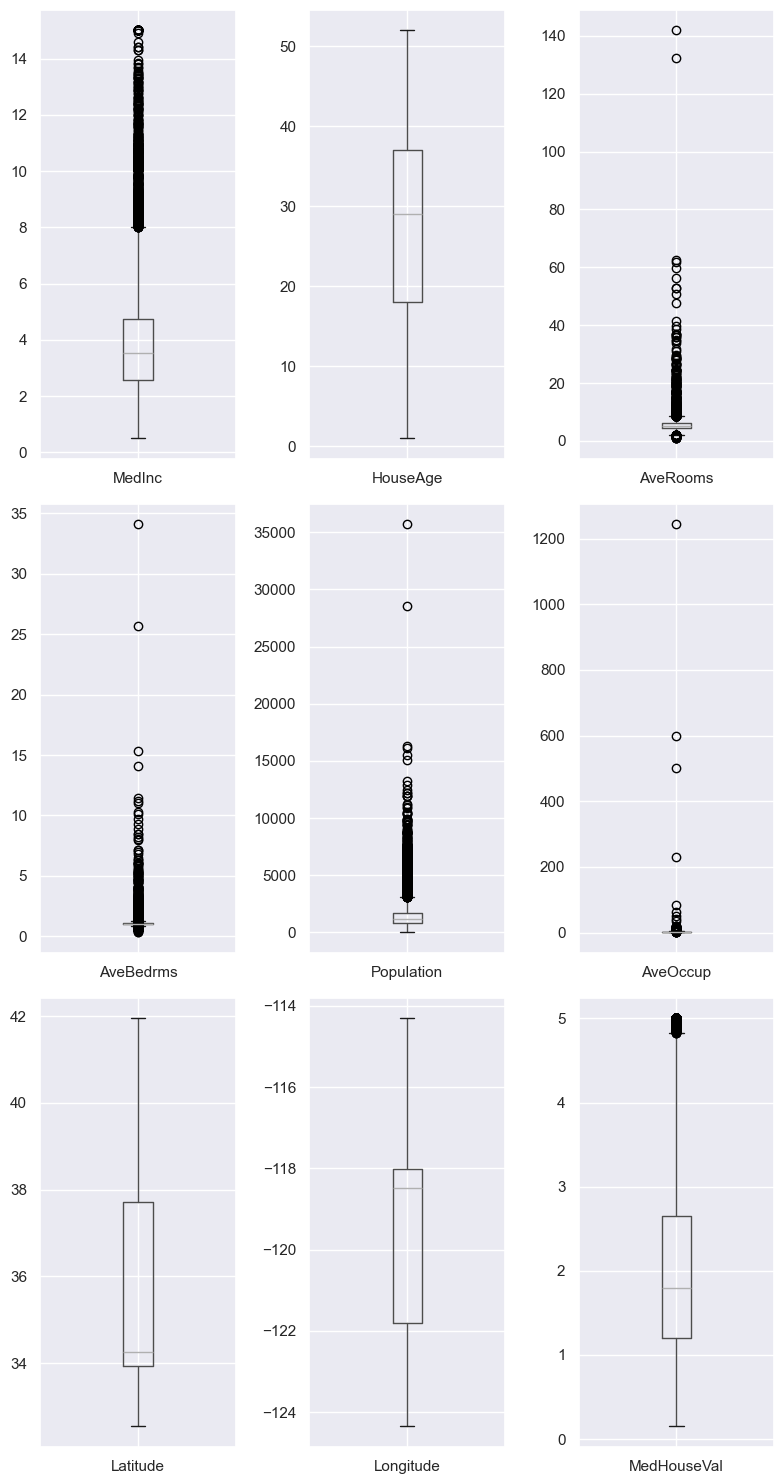

In [8]:
# Visualizamos otuliers
fig, axes = plt.subplots(3, 3, figsize= (8,15))

for i, el in enumerate(df_housing.columns.values):
    df_housing.boxplot(el, ax=axes.flatten()[i])

plt.tight_layout()
plt.show()

In [9]:
Q1 = df_housing.quantile(0.25)
Q3 = df_housing.quantile(0.75)
IQR = Q3 - Q1
mask = ((df_housing < (Q1 - 1.5 * IQR)) | (df_housing > (Q3 + 1.5 * IQR)))

print("\nOutilers primer cuartil:")
print(df_housing[df_housing < (Q1 - 1.5 * IQR)].count())
print("\nOutliers tercer cuartil:")
print(df_housing[df_housing > (Q3 + 1.5 * IQR)].count())


Outilers primer cuartil:
MedInc           0
HouseAge         0
AveRooms        45
AveBedrms      188
Population       0
AveOccup         7
Latitude         0
Longitude        0
MedHouseVal      0
dtype: int64

Outliers tercer cuartil:
MedInc          681
HouseAge          0
AveRooms        466
AveBedrms      1236
Population     1196
AveOccup        704
Latitude          0
Longitude         0
MedHouseVal    1071
dtype: int64


In [10]:
print("\nOutliers totales:")
print(df_housing[mask].count())


Outliers totales:
MedInc          681
HouseAge          0
AveRooms        511
AveBedrms      1424
Population     1196
AveOccup        711
Latitude          0
Longitude         0
MedHouseVal    1071
dtype: int64


In [11]:
df_housing_wout_outliers = df_housing.copy()
df_housing_wout_outliers[mask] = np.nan
print("\nPorcentaje de outliers:", (len(df_housing) - len(df_housing_wout_outliers.dropna()))/len(df_housing)*100)


Porcentaje de outliers: 20.968992248062015


In [12]:
# df_housing[mask] = np.NAN
# df_housing.dropna()
# X, y = df_housing.iloc[:, :-1].copy(), df_housing.iloc[:, -1:].copy()

### Ejericio 1:

> 1. 1. Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o directamente graficar usando un mapa de calor.

#### Correlación entre los atributos

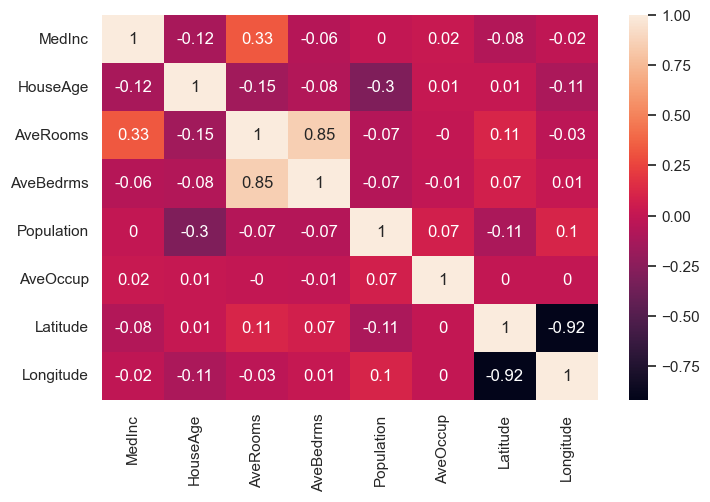

In [13]:
# Correlación entre los atributos.
plt.figure(figsize=(8, 5))
sns.heatmap(data=X.corr().round(2), annot=True)
plt.show()

*Según el mapa de calor, podemos ver que los atributos que están más relacionados son la cantidad de habitaciones junto la cantidad de cuartos de dormir (bedrooms). Esto parece lógico, en el sentido de que un conjunto pertenece a otro (cuartos de dormir es subconjunto de habitaciones). Y la latitud y longitud.*

#### Correlación entre la variable objetivo

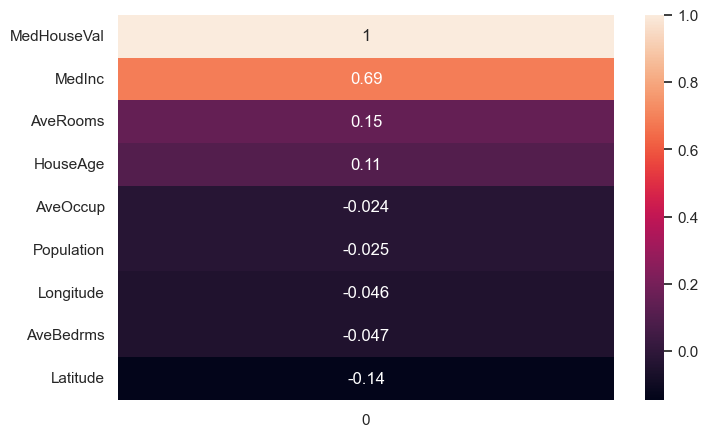

In [14]:
# Correlación con la variable objetivo.
plt.figure(figsize=(8,5))
sns.heatmap(data=pd.DataFrame(df_housing.corrwith(df_housing['MedHouseVal']).sort_values(ascending=False)), annot=True)
plt.show()

*Podemos observar que el atributo MedInc tiene una alta relación lineal con la variable objetivo.*

### Ejericio 2:

> 2. Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?

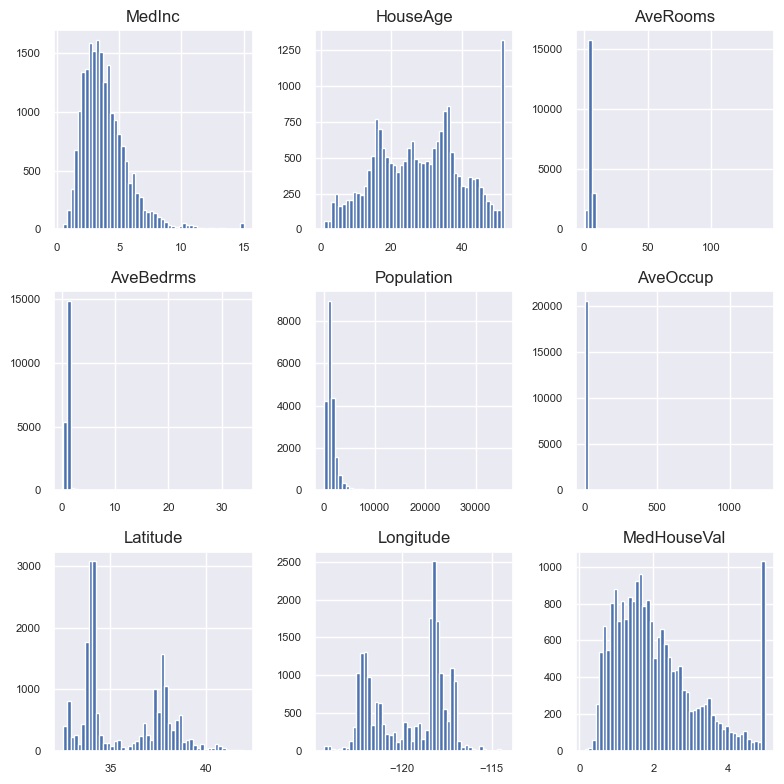

In [15]:
df_housing.hist(figsize=(8,8), xlabelsize=8, ylabelsize=8, bins=50)
plt.tight_layout()
plt.show()

*Podemos observar que hay datos que no siguen una distribución gausiana, sin embargo, hay otros que sí podrían seguir, como: MedInc e HouseAge, así como la variable objetivo.*

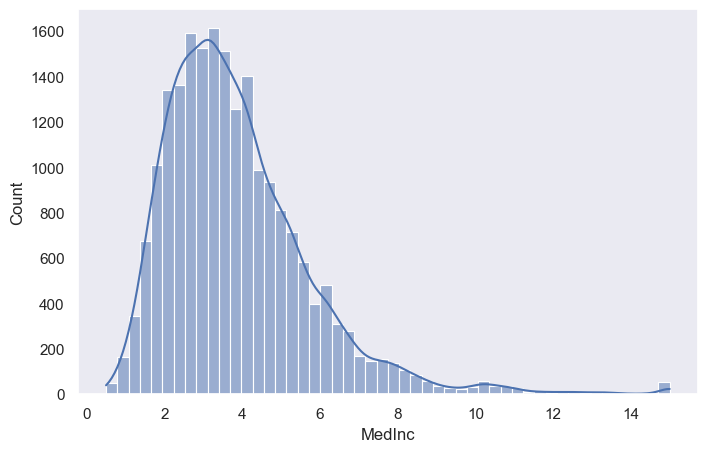

In [16]:
# Graficamos para el atributo MedInc
df_for_ploting = df_housing['MedInc']
plt.figure(figsize=(8, 5))
sns.histplot(data=df_for_ploting, kde=True, bins=50)
plt.show()

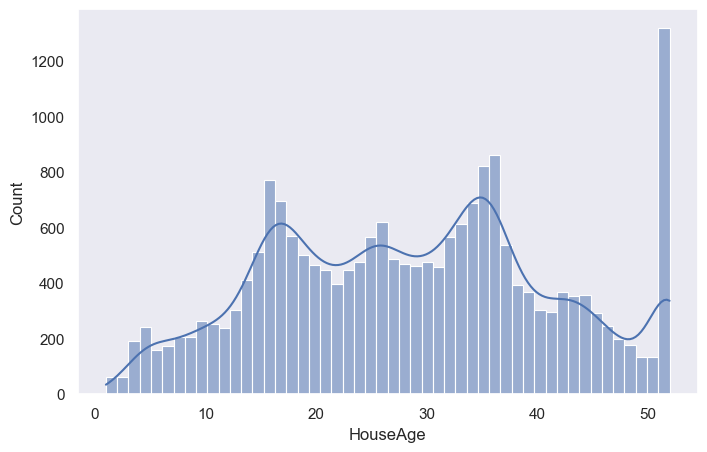

In [17]:
# Graficamos para el atributo HouseAge
df_for_ploting = df_housing['HouseAge']
plt.figure(figsize=(8, 5))
sns.histplot(data=df_for_ploting, kde=True, bins=50)
plt.show()

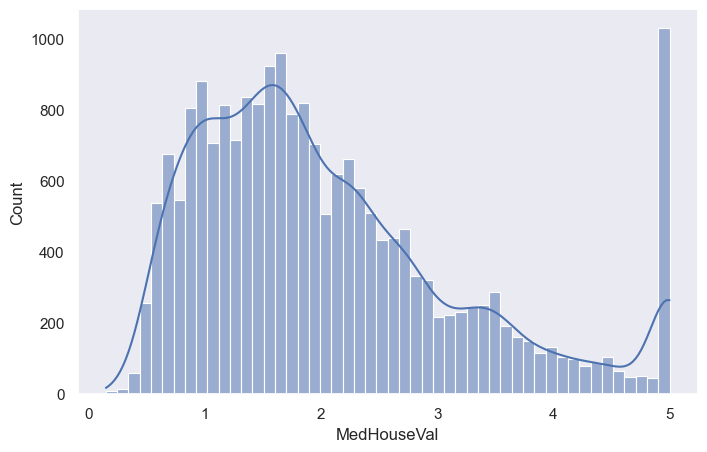

In [18]:
# Graficamos para el atributo MedHouseVal
df_for_ploting = df_housing['MedHouseVal']
plt.figure(figsize=(8, 5))
sns.histplot(data=df_for_ploting, kde=True, bins=50)
plt.show()

### Ejercicio 3:

> 3. Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.

In [19]:
# Separando nuestro dataset en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Datos de train y de test
print("Dimension de X_train:",X_train.shape)
print("Valores de y_train:",y_train.size)
print("Dimension de X_test:",X_test.shape)
print("Valores de y_test:",len(y_test))

Dimension de X_train: (14448, 8)
Valores de y_train: 14448
Dimension de X_test: (6192, 8)
Valores de y_test: 6192


In [20]:
df_train = pd.concat([X_train, y_train], axis=1)

In [21]:
# Tratamiento de outliers.
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
mask = ((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR)))

In [22]:
df_train[mask] = np.nan
df_train.dropna(inplace=True)
X_train, y_train = df_train.iloc[:, :-1].copy(), df_train.iloc[:, -1:].copy()

In [24]:
# Para normalizar un dataframe:
# normalized_df=(df-df.mean())/df.std() # Estandarizar utilizando la media.
# normalized_df=(df-df.min())/(df.max()-df.min()) # Normalizar utilizando min-max

# Escalo los datos.
sc_X = StandardScaler()
# min_max_scaler = MinMaxScaler()

# Conjunto de entrenamiento.
X_train_scaled = sc_X.fit_transform(X_train)
# Conjunto de evaluación.
X_test_scaled = sc_X.transform(X_test)
# Para quedarme con el nombre de las columnas si quiero:
# df = pd.DataFrame(X_train_scaled, colums=X.colums)

print(f"Las medias del escalador es {sc_X.mean_}")
print(f"Los desvío estándar del escalador es {np.sqrt(sc_X.var_)}")

Las medias del escalador es [ 3.66635520e+00  2.93976094e+01  5.16402401e+00  1.04761066e+00
  1.27607708e+03  2.86498470e+00  3.56900343e+01 -1.19644841e+02]
Los desvío estándar del escalador es [1.44792289e+00 1.21895342e+01 1.04454691e+00 6.64674690e-02
 6.25384059e+02 6.22337825e-01 2.13922044e+00 1.99267801e+00]


<Figure size 800x500 with 0 Axes>

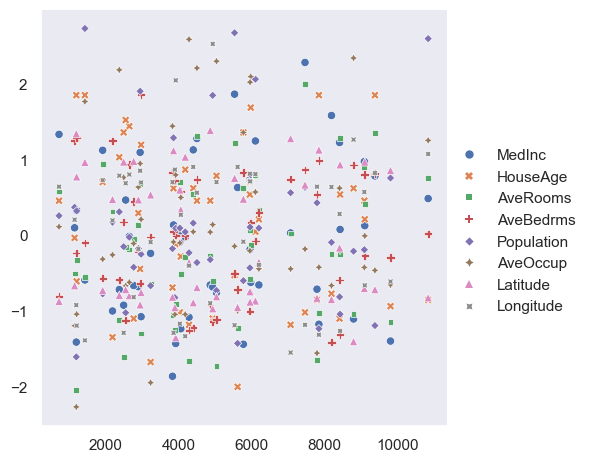

In [25]:
# Hago un preview gráfico de los datos.
plt.figure(figsize=(8, 5))
sns.relplot(pd.DataFrame(X_train_scaled, columns=X.columns).sample(50))
plt.show()

In [26]:
# Entrenamiento.
linear_model = LinearRegression()

linear_model.fit(X_train_scaled, y_train)

print(f"El valor de la interseccion de la recta sera {linear_model.intercept_ }")
print(f"Los valores de los coeficientes de la recta sera {linear_model.coef_ }")

El valor de la interseccion de la recta sera [1.92719529]
Los valores de los coeficientes de la recta sera [[ 0.65754003  0.12733449 -0.13189951  0.08534601  0.05437381 -0.22724841
  -0.81211429 -0.756339  ]]


In [28]:
# Coeficiente de pearson.
print(f"El coeficiente de Pearson es {linear_model.score(X_train_scaled, y_train)}")

El coeficiente de Pearson es 0.6392352581549929


In [30]:
# Calculamos el desvío estándar del modelo
# S_E (Varianza que no explica el model0)
std_S_E = np.sum((y_train - linear_model.predict(X_train_scaled))**2)
print(f"Varianza que no explica el modeo {std_S_E}")

# S_T (Varianza que explica el modelo)
std_S_R = np.sum((linear_model.predict(X_train_scaled) - np.mean(y_train))**2)
print(f"Varianza que epxlica el modelo {std_S_R}")

# Desvio estandar del modelo.
std_dev_model = np.sqrt(std_S_E/(y_train.size - X.columns.size - 1))
print(f"Desvío estándar del modelo {std_dev_model}")

Varianza que no explica el modeo MedHouseVal    3639.215403
dtype: float64
Varianza que epxlica el modelo 6448.287561374971
Desvío estándar del modelo MedHouseVal    0.565774
dtype: float64


d:\Documentos\Git Repositories\uba-ceia\.venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


*Como tenemos un $R^2$ bastante alejado de 1, podemos decir que el modelo no ajusta bien los datos, ya que los residuos no son lo suficientemente chicos (cuanto más cerca de 1 esté el coficiente de Pearson, indica un mejor ajuste, o sea, residuos más chicos). Esto aasumiendo que la relación entre las variables independientes y la variable dependiente es realmente linea y el residuo se distribuye de forma normal*

### Ejercicio 4:

> 4. Calcular las métricas de MSE, MAE y $R^2$ del set de evaluación.

In [31]:
# Obtenemos las predicciones utilizando el conjunto de evaluación.
y_pred = linear_model.predict(X_test_scaled)

In [32]:
# Obtenemos los errores del modelo.
r2_lineal = r2_score(y_test, y_pred) # Cuanto más se acerque a 1 mejor.
mae_lineal = mean_absolute_error(y_test, y_pred) # Cuanto más se acerque a 0 mejor.
mse_lineal = mean_squared_error(y_test, y_pred) # Cuanto más se acerque a 0 mejor.

print("R-cuadrado en test:", r2_lineal)
print("Error absoluto medio:", mae_lineal)
print("Error cuadratico medio:", mse_lineal)

R-cuadrado en test: 0.36497077780885145
Error absoluto medio: 0.5153165423460411
Error cuadratico medio: 0.833501323759724


### Ejercicio 5:

> 5. Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el mejor valor de $\alpha$, buscando entre [0, 12.5]. 
Graficar el valor de MSE versus $\alpha$.

In [33]:
# Modelo Ridge.
alpha = 10
ridge_model = Ridge(alpha=alpha)

ridge_model.fit(X_train_scaled, y_train)
print(f"El valor de la interseccion de la recta sera {ridge_model.intercept_ }")
print(f"Los valores de los coeficientes de la recta sera {ridge_model.coef_ }")

El valor de la interseccion de la recta sera [1.92719529]
Los valores de los coeficientes de la recta sera [[ 0.65909616  0.12829809 -0.1331866   0.08532038  0.05461358 -0.22717886
  -0.79993625 -0.74439431]]


In [34]:
# Obtenemos las predicciones utilizando el conjunto de evaluación.
y_pred = ridge_model.predict(X_test_scaled)

In [35]:
# Obtenemos los errores del modelo.
r2_ridge = r2_score(y_test, y_pred) # Cuanto más se acerque a 1 mejor.
mae_ridge = mean_absolute_error(y_test, y_pred) # Cuanto más se acerque a 0 mejor.
mse_ridge = mean_squared_error(y_test, y_pred) # Cuanto más se acerque a 0 mejor.

print("R-cuadrado en test:", r2_ridge)
print("Error absoluto medio:", mae_ridge)
print("Error cuadratico medio:", mse_ridge)

R-cuadrado en test: 0.3661220701070592
Error absoluto medio: 0.5152847192455758
Error cuadratico medio: 0.831990206442509


In [36]:
# Obtenemos una lista de alphas a probar.
alpha_values = np.linspace(0, 12.5, 100)
mse_values = []

for alpha in alpha_values:
    # Creamos el modelo con el alpha actual
    ridge_model = Ridge(alpha=alpha)

    # Ejecutamos cross validation para ese alpha.
    cv = cross_val_score(ridge_model, X_train_scaled, y=y_train, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
    # cv = cross_val_score(ridge_model, X_train_scaled, y=y_train, scoring="neg_mean_absolute_error", cv=5, n_jobs=-1)

    # Guardamos la media del MSE.
    mse_values.append(cv.mean()*-1)

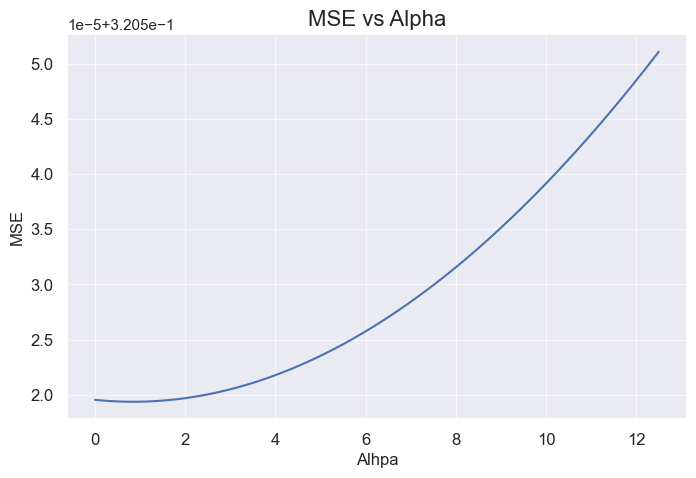

In [37]:
# Graficamos.
plt.figure(figsize=(8, 5))
plt.plot(alpha_values, mse_values)
plt.grid(True, linewidth=0.5)
plt.xlabel('Alhpa')
plt.ylabel('MSE')
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('MSE vs Alpha', fontsize=16)
plt.show()

In [127]:
print(f"El valor de alpha que minimiza el error es alpha={alpha_values[np.argmin(np.array(mse_values))]}")

El valor de alpha que minimiza el error es alpha=6.565656565656566


### Ejercicio 6:

> 6. Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. 
¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse reducido?

In [128]:
# Calculamos el error del modelo ridge mejorado.
ridge_model = Ridge(alpha=alpha_values[np.argmin(np.array(mse_values))])

ridge_model.fit(X_train_scaled, y_train)

# Obtenemos las predicciones utilizando el conjunto de evaluación.
y_pred = ridge_model.predict(X_test_scaled)

# Obtenemos los errores del modelo.
r2_ridge = r2_score(y_test, y_pred) # Cuanto más se acerque a 1 mejor.
mae_ridge = mean_absolute_error(y_test, y_pred) # Cuanto más se acerque a 0 mejor.
mse_ridge = mean_squared_error(y_test, y_pred) # Cuanto más se acerque a 0 mejor.

In [129]:
print("Ridge")
print("R-cuadrado en test:", r2_ridge)
print("Error absoluto medio:", mae_ridge)
print("Error cuadratico medio:", mse_ridge)

Ridge
R-cuadrado en test: 0.5958866942308552
Error absoluto medio: 0.5272217082364
Error cuadratico medio: 0.5304149219232501


In [130]:
print("Lineal")
print("R-cuadrado en test:", r2_lineal)
print("Error absoluto medio:", mae_lineal)
print("Error cuadratico medio:", mse_lineal)

Lineal
R-cuadrado en test: 0.5957702326061665
Error absoluto medio: 0.5272474538305952
Error cuadratico medio: 0.5305677824766752


*El modelo mejora muy poco. Cabe destacar la posibilidad de que un modelo lineal lo logra generalizar correctamente. En este caso se redujeron en menor medida los errores.*